In [1]:
# Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
# check if any null value is present
data.isnull().values.any()

False

In [6]:
# checking the correlartion 
corrmat = data.corr()
top_corr_features = corrmat.index
# top_corr_features
plt.figure(figsize=(30,30))
# plt.plot(top_corr_features)
# plt.show()

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

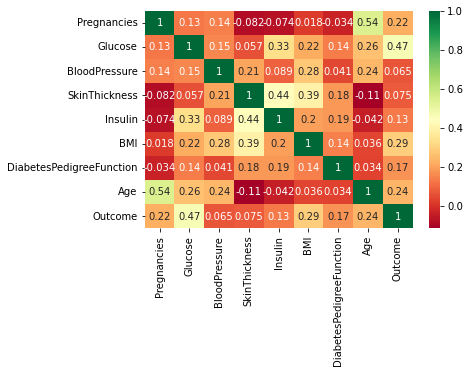

In [7]:
# plot heatmap
g=sns.heatmap(data[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# Counting number of zeros and ones
diabetes_one_count = len(data.loc[data['Outcome']==1])
diabetes_zero_count = len(data.loc[data['Outcome']==0])

In [10]:
print(diabetes_one_count)
print(diabetes_zero_count)

268
500


In [11]:
top_corr_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# Train test split
from sklearn.model_selection import train_test_split
feature_columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class=['Outcome']

In [13]:
X=data[feature_columns].values
y=data[predicted_class].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [17]:
print("Number of rows : {0}".format(len(data)))
print("Number of rows missing pregnancies: {0}".format(len(data.loc[data['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing blood pressure: {0}".format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing skin thickness: {0}".format(len(data.loc[data['SkinThickness']==0])))
print("Number of rows missing insulin: {0}".format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI: {0}".format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}".format(len(data.loc[data['Age']==0])))

Number of rows : 768
Number of rows missing pregnancies: 111
Number of rows missing Glucose: 5
Number of rows missing blood pressure: 35
Number of rows missing skin thickness: 227
Number of rows missing insulin: 374
Number of rows missing BMI: 11
Number of rows missing DiabetesPedigreeFunction: 0
Number of rows missing Age: 0


In [21]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)

In [24]:
# Apply algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [25]:
predict_train_data = random_forest_model.predict(X_test)


In [26]:
from sklearn import metrics
print("Accuracy= {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy= 0.766


In [27]:
# hyperparameter optimization
params={
    "learning_rate":[0.5,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [31]:
from sklearn .model_selection import RandomizedSearchCV
import xgboost as xgb

In [33]:
classifier = xgb.XGBClassifier()

In [34]:
random_search=RandomizedSearchCV(classifier,param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1,cv=5,verbose=3)

In [36]:
random_search.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [37]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [45]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [46]:
y_pred=classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[121  23]
 [ 37  50]]
0.7402597402597403


In [41]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier, X_train,y_train.ravel(),cv=10)

In [42]:
score

array([0.72222222, 0.7962963 , 0.77777778, 0.77777778, 0.7037037 ,
       0.74074074, 0.83333333, 0.71698113, 0.77358491, 0.81132075])

In [44]:
score.mean()

0.7653738644304683

# COMPLETED